### Importing the neccesary modules 


In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
df = pd.read_csv('./Global+Superstore+Data.csv')

In [289]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


### Understanding the data

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [291]:
df.isnull().sum()
# Soo no null values data is already cleaned

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [292]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [293]:
# Different market and customer segments
df['Market'].unique()

#  7 places = 'US' , 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [294]:
df['Segment'].unique()

# 3  segements = ['Consumer', 'Corporate', 'Home Office']
# In total 21 unique segements

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

### Finding out the most profitable market segement

In [295]:
df['combinedMarketSegment'] = df['Market'] + '-' + df['Segment']

In [345]:
df['combinedMarketSegment'].unique()
# cross checking

array(['US-Consumer', 'APAC-Corporate', 'APAC-Consumer', 'EU-Home Office',
       'Africa-Consumer', 'US-Corporate', 'EMEA-Consumer',
       'LATAM-Home Office', 'EU-Corporate', 'EMEA-Corporate',
       'LATAM-Consumer', 'EU-Consumer', 'US-Home Office',
       'LATAM-Corporate', 'Africa-Corporate', 'APAC-Home Office',
       'EMEA-Home Office', 'Africa-Home Office', 'Canada-Corporate',
       'Canada-Home Office', 'Canada-Consumer'], dtype=object)

In [297]:
# next converting the dataset
# converting the date into the required format
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
# to_period m convert to month

C:\Users\SAM\AppData\Local\Temp\ipykernel_11912\3464277095.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')


In [298]:
df_agg = df.pivot_table(index='Order Date', values='Profit',columns='combinedMarketSegment',aggfunc='sum')
# as we are only concerned with the profit

In [299]:
df_agg.head()

combinedMarketSegment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [300]:
df_agg.shape

(48, 21)

In [301]:
# Train - test Split
train_len = 42
train_df = df_agg[0 : train_len]
test_df = df_agg[train_len :]

In [302]:
train_df.shape

(42, 21)

In [303]:
test_df.shape
# combined is 48

(6, 21)

In [304]:
# Finding our the covariance
mean = np.mean(train_df)
std = np.std(train_df)
convariance_df =pd.DataFrame(mean)
convariance_df['std'] = std
convariance_df['covariance'] = std / mean
convariance_df.sort_values(by='covariance',ascending=True)
convariance_df

c:\sahil\code\upgrad\assignment\Global_Mart\env\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0,std,covariance
combinedMarketSegment,,,
APAC-Consumer,4400.894243,2300.457687,0.522725
APAC-Corporate,2574.919807,1364.837734,0.530051
APAC-Home Office,1511.088314,1523.508658,1.008219
Africa-Consumer,957.707000,1254.932072,1.310351
Africa-Corporate,412.617571,780.566850,1.891744
Africa-Home Office,377.221071,759.322203,2.012937
Canada-Consumer,225.987632,282.555788,1.250315
Canada-Corporate,90.980294,162.493114,1.786025
Canada-Home Office,118.003750,279.632866,2.369695


### Inference
#### APAC - Consumer has the lowest covariance 0.522725
hence we should focus on this sector as we want the least variance in our profits

### Model building and evaluation

In [305]:
df.dtypes

Order Date               period[M]
Segment                     object
Market                      object
Sales                      float64
Profit                     float64
combinedMarketSegment       object
dtype: object

In [306]:
#  convert to timestamp
df['Order Date'] = df['Order Date'].astype(str)
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [307]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [308]:
# df['combinedMarketSegment' ==]

In [309]:
#  Getting rid of all the other sectors other than 'APAC_Consumer'
retail_df = df[(df['combinedMarketSegment'] =='APAC-Consumer')]
retail_df.head()

,Order Date,Segment,Market,Sales,Profit,combinedMarketSegment
2,2013-10-01,Consumer,APAC,5175.171,919.971,APAC-Consumer
6,2011-07-01,Consumer,APAC,1822.080,564.840,APAC-Consumer
7,2012-04-01,Consumer,APAC,5244.840,996.480,APAC-Consumer
14,2013-06-01,Consumer,APAC,3701.520,1036.080,APAC-Consumer
29,2012-02-01,Consumer,APAC,1878.720,582.360,APAC-Consumer


In [310]:
retail_df

,Order Date,Segment,Market,Sales,Profit,combinedMarketSegment
2,2013-10-01,Consumer,APAC,5175.1710,919.9710,APAC-Consumer
6,2011-07-01,Consumer,APAC,1822.0800,564.8400,APAC-Consumer
7,2012-04-01,Consumer,APAC,5244.8400,996.4800,APAC-Consumer
14,2013-06-01,Consumer,APAC,3701.5200,1036.0800,APAC-Consumer
29,2012-02-01,Consumer,APAC,1878.7200,582.3600,APAC-Consumer
...,...,...,...,...,...,...
51215,2013-01-01,Consumer,APAC,38.9709,-32.3991,APAC-Consumer
51234,2014-12-01,Consumer,APAC,6.9000,-0.8400,APAC-Consumer
51235,2011-03-01,Consumer,APAC,17.2800,-13.9200,APAC-Consumer
51236,2013-07-01,Consumer,APAC,30.6180,1.0080,APAC-Consumer


In [311]:
data = pd.DataFrame(retail_df.groupby('Order Date')['Sales'].sum())

In [312]:
data

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000
2011-06-01,30398.9316
2011-07-01,22431.5949
2011-08-01,20331.0735
2011-09-01,24860.3949


## Time Series Analysis

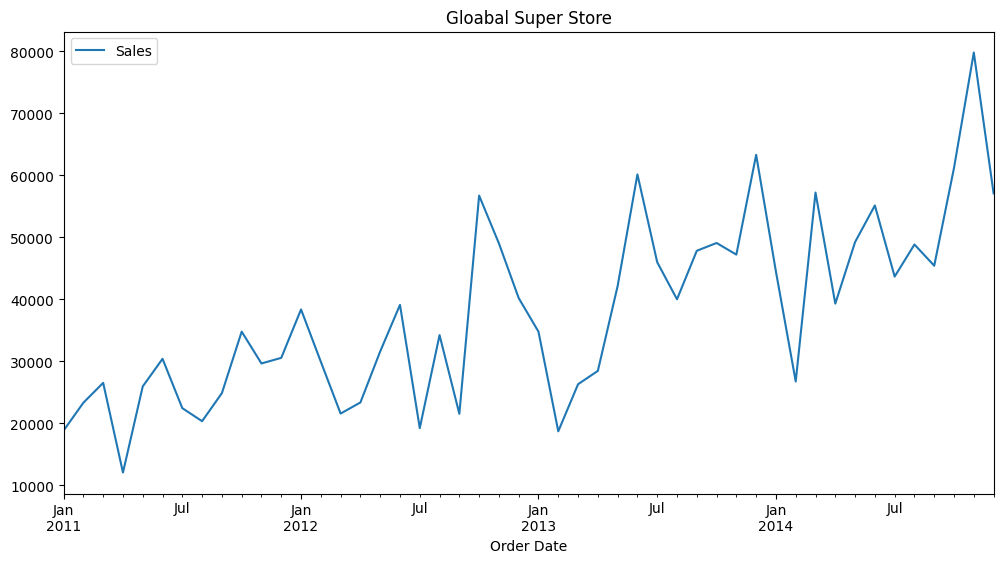

In [313]:
data.plot(figsize=(12,6))
plt.legend(loc ='best')
plt.title('Gloabal Super Store')
plt.show()

### Decomposition

In [314]:
from pylab import rcParams
# so that we can set a default value for the parameters
import statsmodels.api as sm

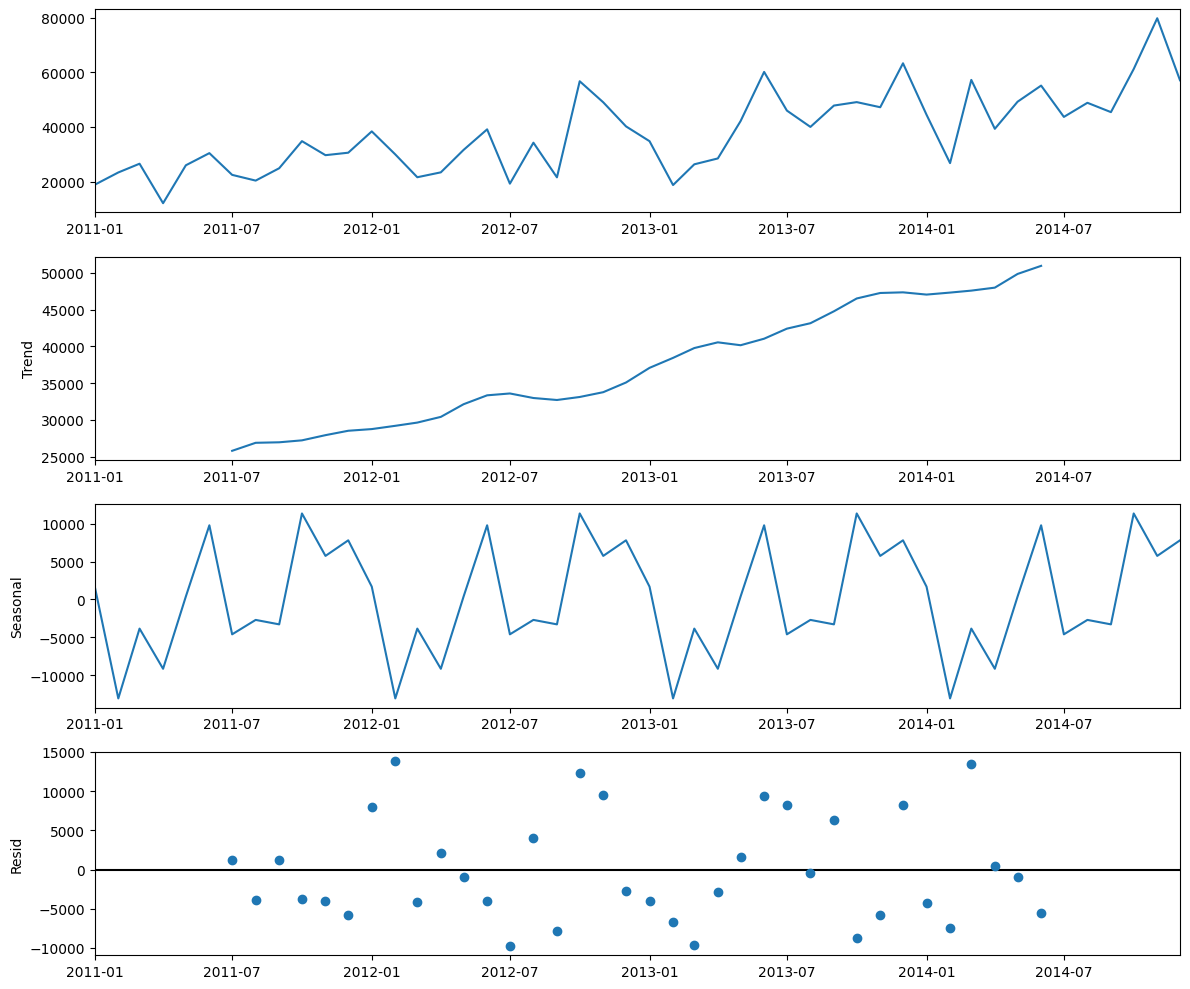

In [315]:
rcParams['figure.figsize'] = 12,10
decompostion = sm.tsa.seasonal_decompose(data,model='additive')
fig = decompostion.plot()
plt.show()

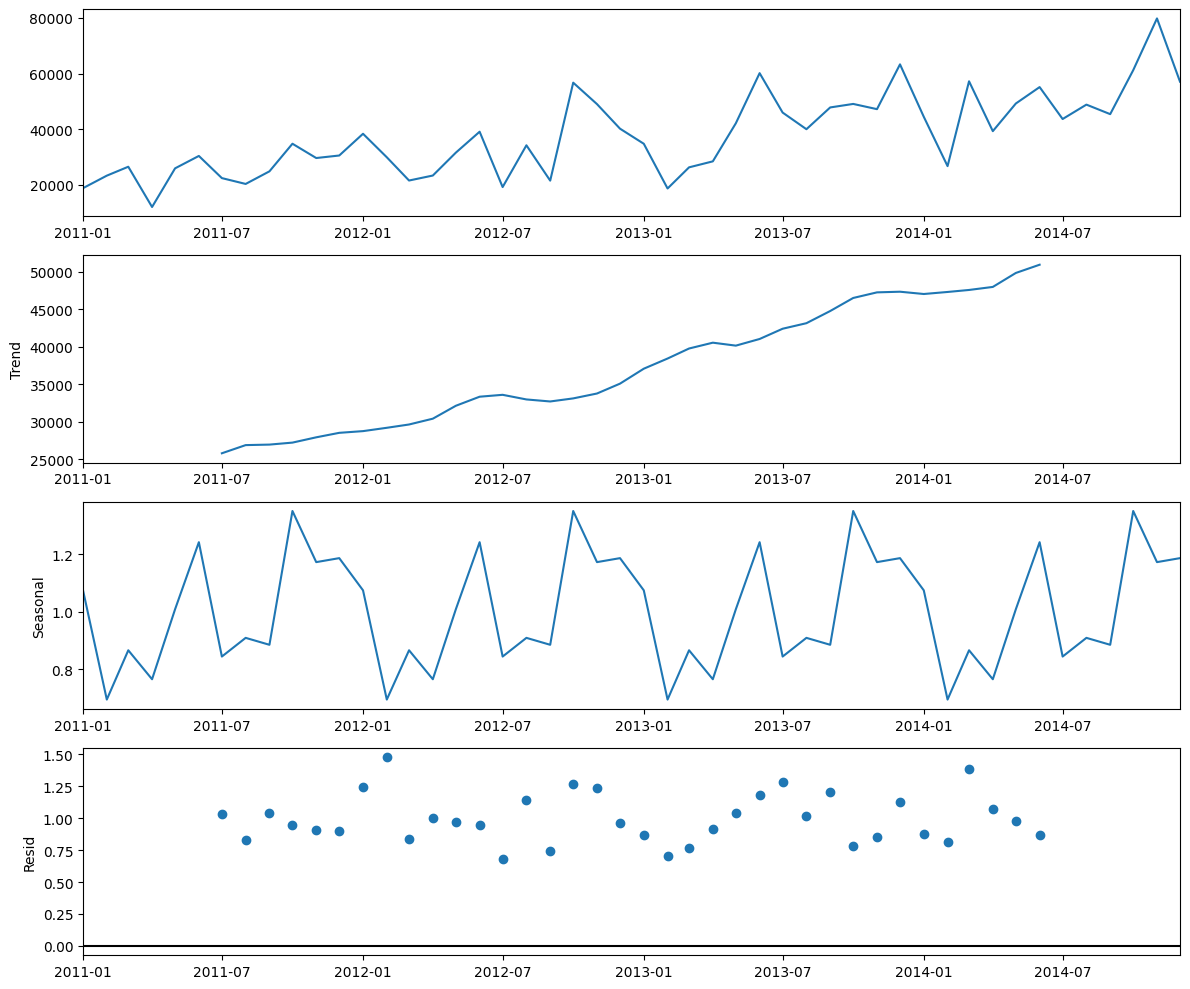

In [316]:
# Multiplicative seasonal decompostion
decompostion = sm.tsa.seasonal_decompose(data,model='multiplicative')
fig =decompostion.plot()
plt.show()

#### Building Simple time Series forcasts

In [317]:
train_len = 42
train_df = data[0:train_len]
test_df = data[train_len :]

In [318]:
train_df

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000
2011-06-01,30398.9316
2011-07-01,22431.5949
2011-08-01,20331.0735
2011-09-01,24860.3949


In [319]:
test_df

,Sales
Order Date,
2014-07-01,43672.0749
2014-08-01,48848.3409
2014-09-01,45424.3119
2014-10-01,61221.9792
2014-11-01,79834.4295
2014-12-01,57099.9858


### Simple time Series Methods

In [320]:
y_hat_naive = test_df.copy()
y_hat_naive['native_forcast'] = train_df['Sales'][train_len - 1]

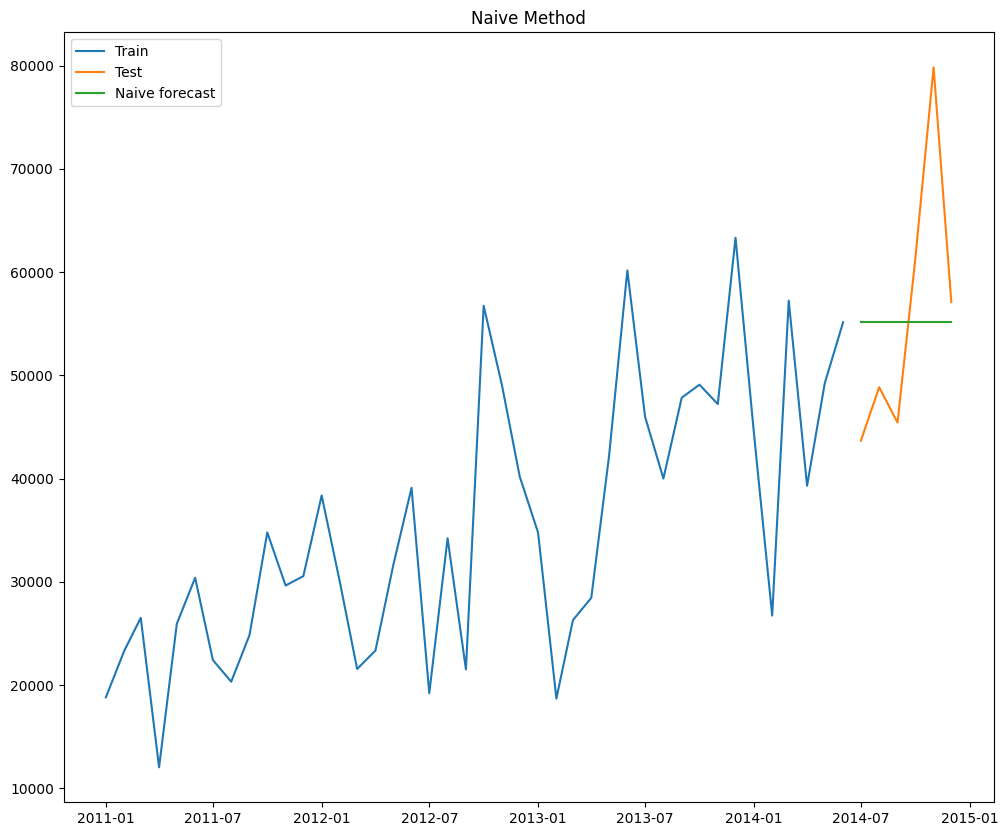

In [321]:
# Plotting
plt.plot(train_df['Sales'],label ='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_naive['native_forcast'],label ='Naive forecast')
plt.legend(loc ='best')
plt.title('Naive Method')
plt.show()

In [322]:
# Calculating RSME AND MAPE
from sklearn.metrics import mean_squared_error
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_naive['native_forcast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_naive['native_forcast'])/test_df['Sales'])* 100,2)
results = pd.DataFrame({'Method':['Naive Method'],'MAPE':[mape],'RSME':[rsme]})
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97


### Simple average Method

In [323]:
y_hat_avg = test_df.copy()
y_hat_avg['avg_forcast'] = train_df['Sales'].mean()

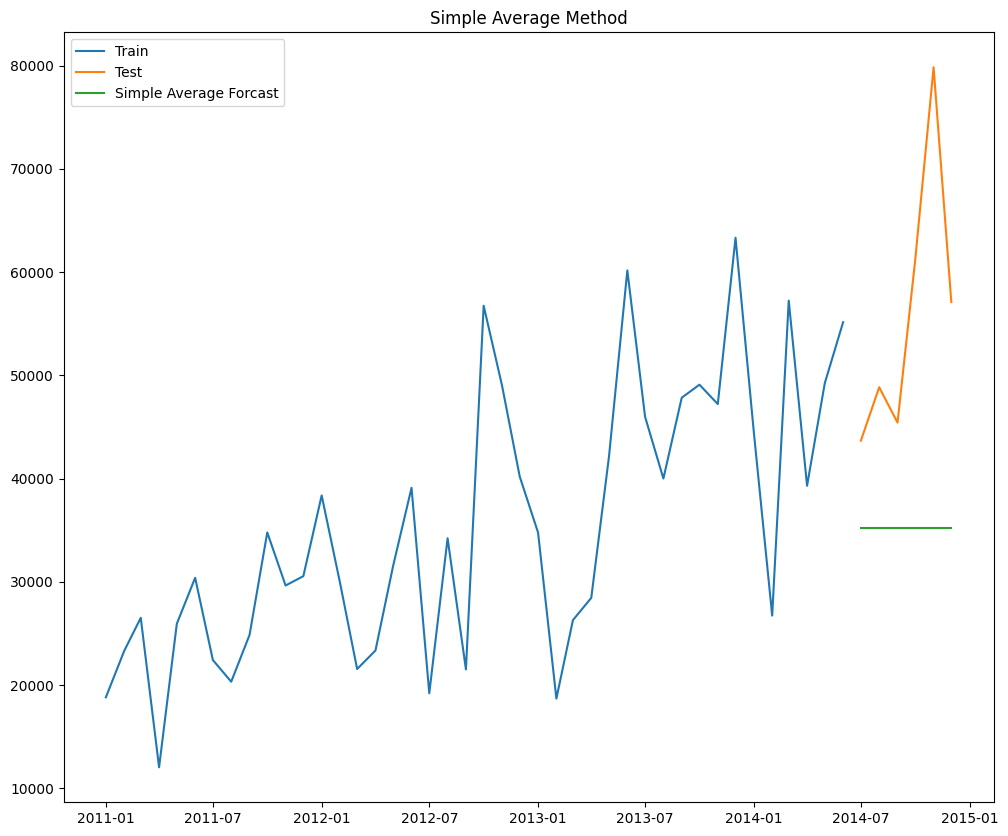

In [324]:
# Plotting
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_avg['avg_forcast'],label='Simple Average Forcast')
plt.legend(loc ='best')
plt.title('Simple Average Method')
plt.show()
# this one's worse

In [325]:
#  Calculate RMSE and MAPE
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_avg['avg_forcast'])).round(2)
mape =np.round(np.mean(np.abs(test_df['Sales']-y_hat_avg['avg_forcast'])/ test_df['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple average Method'],'MAPE':[mape],'RSME':[rsme]})
results =pd.concat([results,tempResults])
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06


### Simple Moving average

In [326]:
y_hat_sma = data.copy()
#  we have to take for the entire data set
ma_window = 12
y_hat_sma['sma_forcast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forcast'][train_len] = y_hat_sma['sma_forcast'][train_len -1]
# to make sure it cannot see the test data

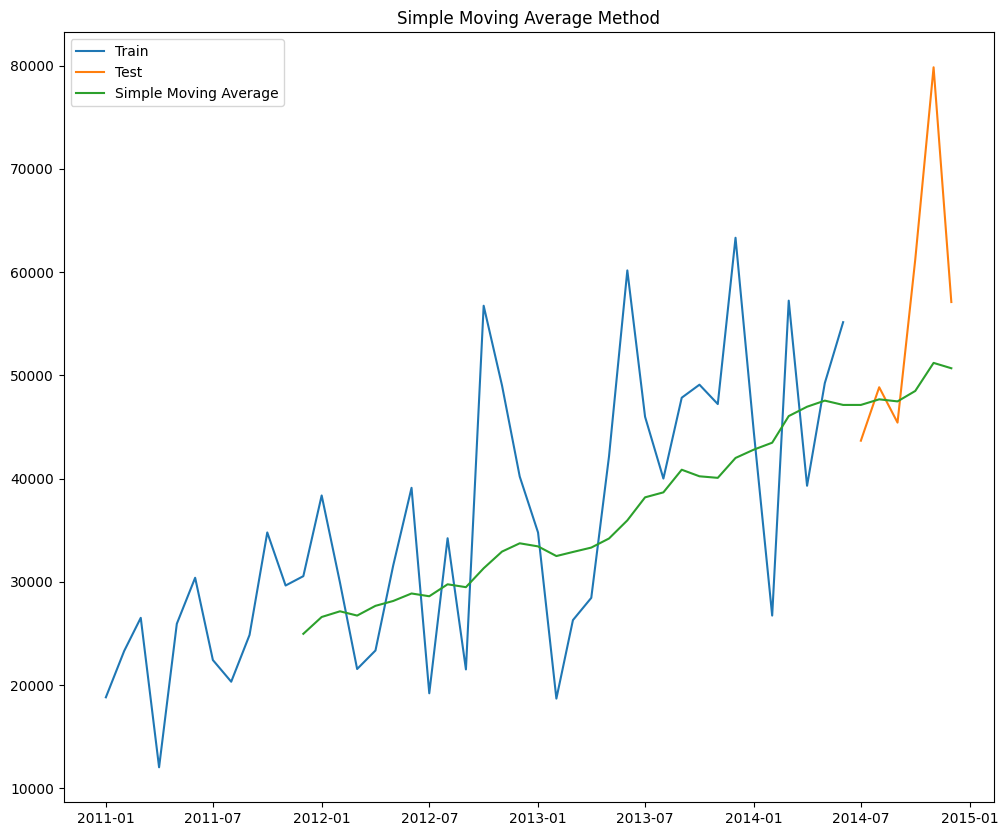

In [327]:
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_sma['sma_forcast'],label ='Simple Moving Average')
plt.legend(loc ='best')
plt.title('Simple Moving Average Method')
plt.show()

In [328]:
## Calculate RSME AND MAPE
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_sma['sma_forcast'][train_len:])).round(2)

mape =np.round(np.mean(np.abs(test_df['Sales']-y_hat_sma['sma_forcast'][train_len:])/ test_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average Method'],'MAPE':[mape],'RSME':[rsme]})

results =pd.concat([results,tempResults])
results


,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96


### Exponential smoothing

In [329]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_df['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test_df.copy()
y_hat_ses['ses_forcast'] = model_fit.forecast(24)

c:\sahil\code\upgrad\assignment\Global_Mart\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


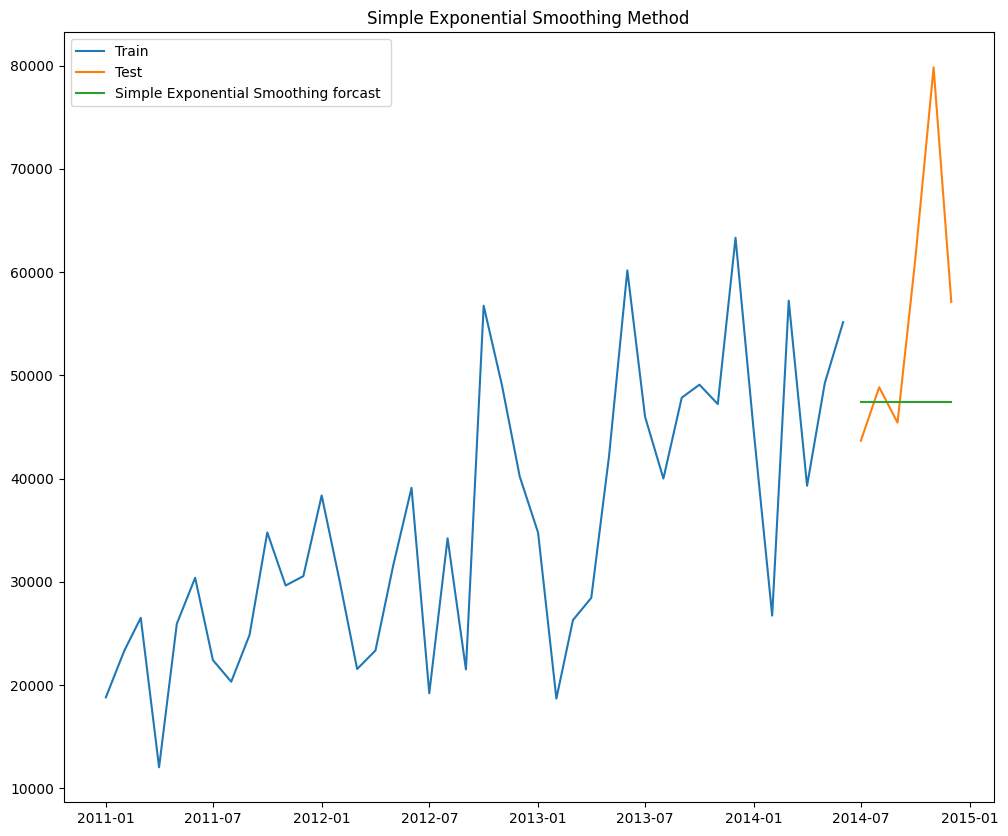

In [330]:
# Plot 
plt.plot(train_df['Sales'],label ='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forcast'],label = 'Simple Exponential Smoothing forcast ')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [331]:
#  Calcualte RSME AND MAPE
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_ses['ses_forcast'])).round(2)

mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_ses['ses_forcast'])/test_df['Sales'])* 100,2)

tempResults = pd.DataFrame({'Method':['Simple Exponential Smoothing forcast'],'MAPE':[mape],'RSME':[rsme]})

results = pd.concat([results,tempResults])
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96
0,Simple Exponential Smoothing forcast,15.99,15011.49


## Holts method with trend

In [332]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_df['Sales']),seasonal_periods =12, trend ='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test_df.copy()
y_hat_holt['holt_forcast'] = model_fit.forecast(len(test_df))


{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18638.663519999987, 'initial_trend': 964.808634545456, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\SAM\AppData\Local\Temp\ipykernel_11912\3418642215.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01, optimized=False)


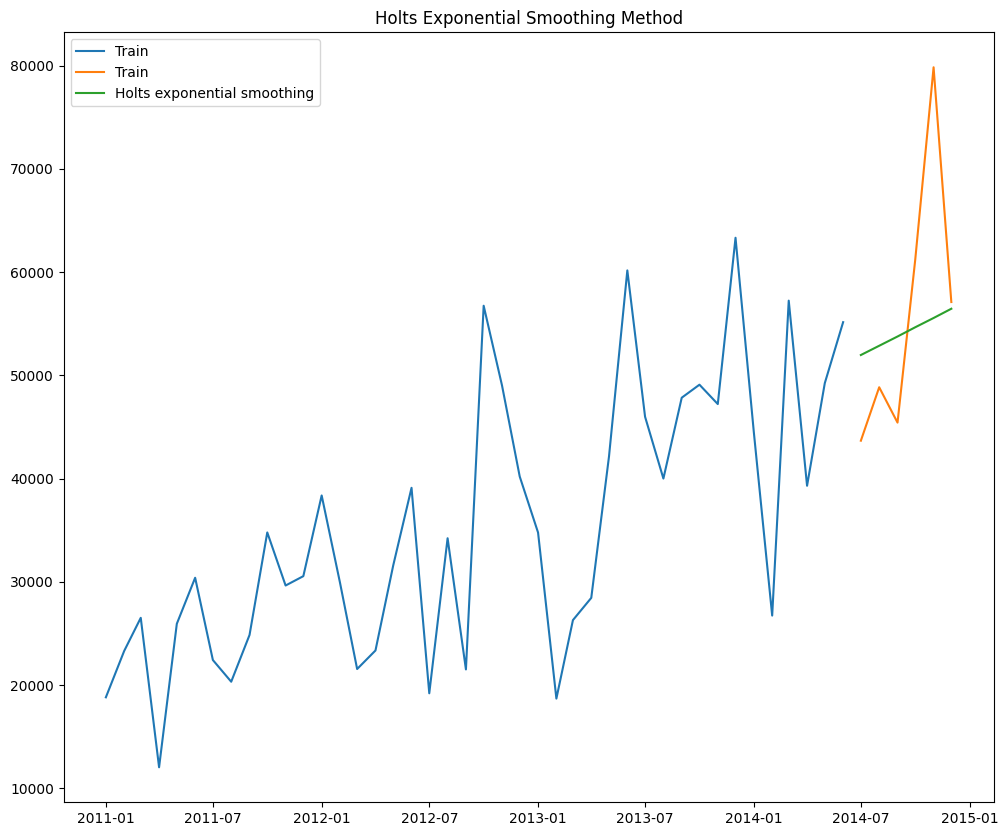

In [333]:
# plot
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label='Train')
plt.plot(y_hat_holt['holt_forcast'], label='Holts exponential smoothing')
plt.legend(loc='best')
plt.title('Holts Exponential Smoothing Method')
plt.show()

In [334]:
#  Calcualte RSME AND MAPE
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_holt['holt_forcast'])).round(2)

mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_holt['holt_forcast'])/test_df['Sales'])* 100,2)

tempResults = pd.DataFrame({'Method':['Holts Exponential Smoothing forcast'],'MAPE':[mape],'RSME':[rsme]})

results = pd.concat([results,tempResults])
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96
0,Simple Exponential Smoothing forcast,15.99,15011.49
0,Holts Exponential Smoothing forcast,14.64,11456.45


In [335]:
# Holts Winters additive Method with trend
y_hat_hwa = test_df.copy()
model = ExponentialSmoothing(np.asarray(train_df['Sales']),seasonal_periods=12,trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6) 

{'smoothing_level': 0.005, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25546.140294166653, 'initial_trend': 468.0048356060628, 'initial_seasons': array([  3952.88057396,  -9211.53080729, -10479.58736354,  -9282.54725729,
         1016.15604896,  12737.03211146,  -8578.55198854,  -2357.83653854,
        -6344.09922604,  15891.83603021,   8787.51308021,   3868.73533646]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\sahil\code\upgrad\assignment\Global_Mart\env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


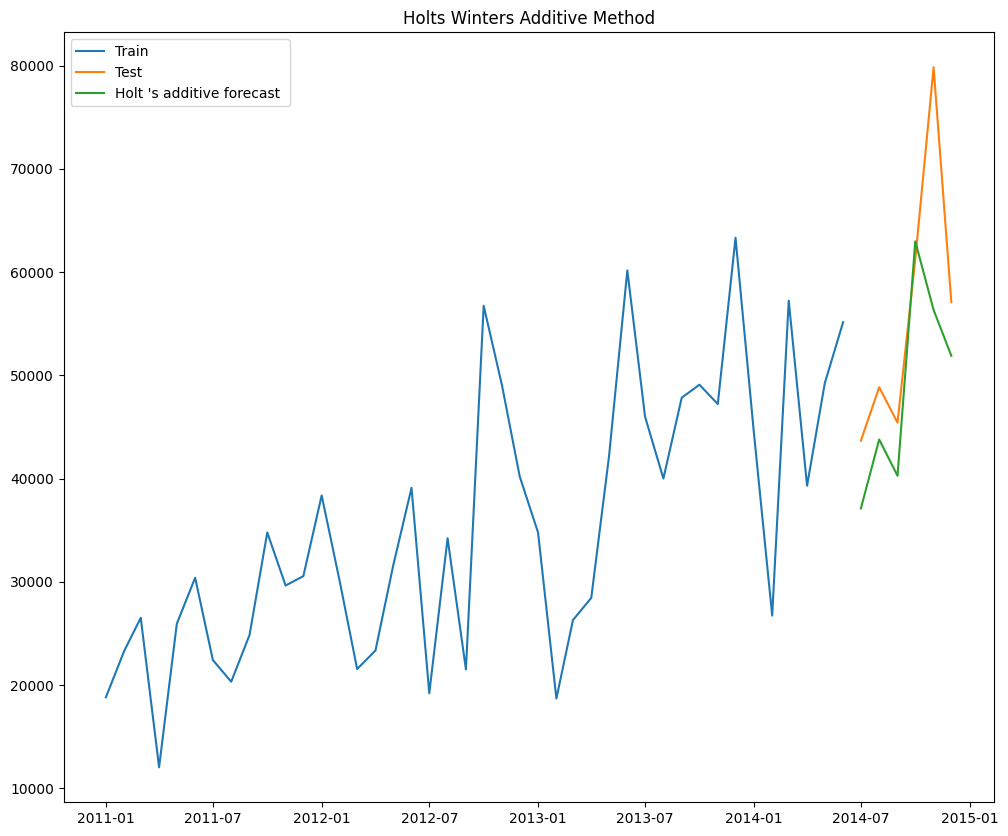

In [336]:
# Plot
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_hwa['hw_forecast'],label='Holt \'s additive forecast ' )
plt.legend(loc='best')
plt.title('Holts Winters Additive Method')
plt.show()

In [337]:
rmse = np.sqrt(mean_squared_error(test_df['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_hwa['hw_forecast'])/test_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Additive method 12m'],'MAPE':[mape],'RSME':[rsme]})

results = pd.concat([results,tempResults])
results


,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96
0,Simple Exponential Smoothing forcast,15.99,15011.49
0,Holts Exponential Smoothing forcast,14.64,11456.45
0,Holts Additive method 12m,13.02,11456.45


### Holts Additive 6m 

In [338]:
y_hat_hwa_12 = test_df.copy()
model = ExponentialSmoothing(np.asarray(train_df['Sales']),seasonal_periods=6,trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa_12['hw_forecast'] = model_fit.forecast(6) 

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.07571428571428572, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 21204.437139999984, 'initial_trend': 1008.0196604545474, 'initial_seasons': array([ -908.12445208, -4490.87347708, -7681.83279583,  2600.02460417,
        4682.86570417,  5797.94041667]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\sahil\code\upgrad\assignment\Global_Mart\env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


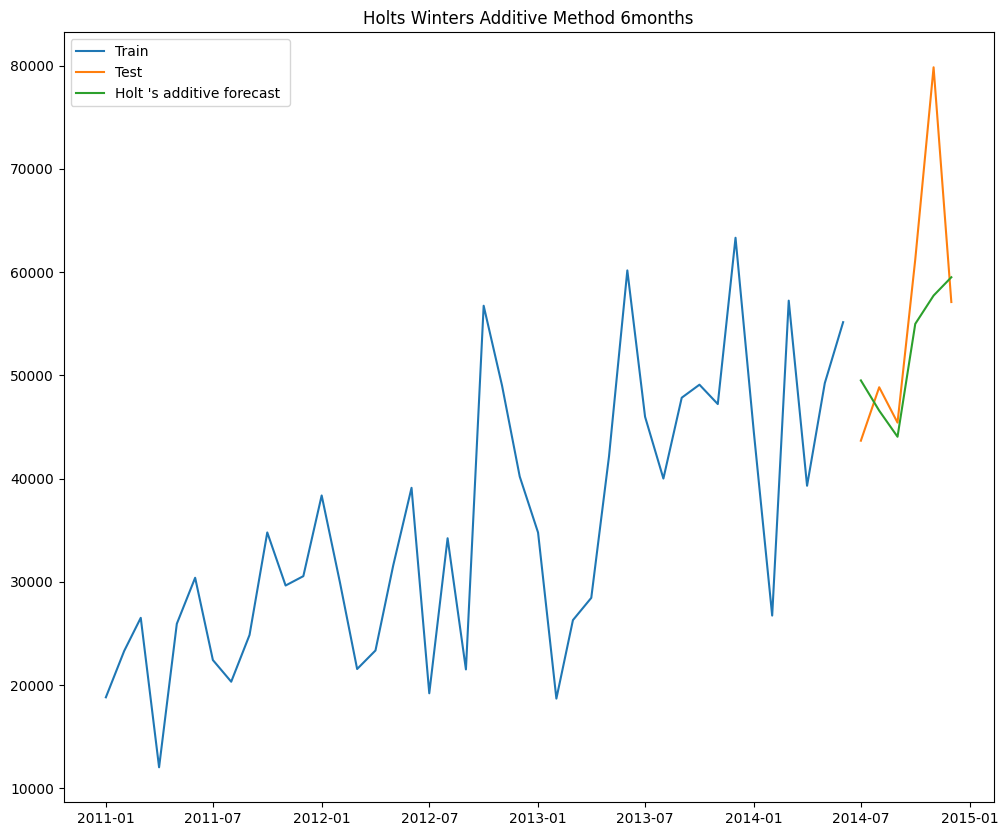

In [339]:
# Plot
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_hwa_12['hw_forecast'],label='Holt \'s additive forecast ' )
plt.legend(loc='best')
plt.title('Holts Winters Additive Method 6months')
plt.show()

In [340]:
rmse = np.sqrt(mean_squared_error(test_df['Sales'], y_hat_hwa_12['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_hwa_12['hw_forecast'])/test_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Additive method 6m'],'MAPE':[mape],'RSME':[rsme]})

results = pd.concat([results,tempResults])
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96
0,Simple Exponential Smoothing forcast,15.99,15011.49
0,Holts Exponential Smoothing forcast,14.64,11456.45
0,Holts Additive method 12m,13.02,11456.45
0,Holts Additive method 6m,10.52,11456.45


#### Holts additive method with seasonal periods for 6 months has been the lowest till (RMSE AND MAPE), which implies error value is compartively less

#### Holts winters Multiplicative Trend

In [341]:
y_hat_hwm = test_df.copy()
model = ExponentialSmoothing(np.asarray(train_df['Sales']),seasonal_periods =12,trend='add',seasonal='mul')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)


{'smoothing_level': 0.004999999999442798, 'smoothing_trend': 9.99999999777119e-05, 'smoothing_seasonal': 0.00010000011087246193, 'damping_trend': nan, 'initial_level': 25546.14029131977, 'initial_trend': 468.00492895953647, 'initial_seasons': array([1.14330212, 0.76036851, 0.99416959, 0.74485334, 1.041506  ,
       1.32751953, 0.84219957, 0.91607233, 0.8919149 , 1.50506931,
       1.26466724, 1.23297359]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\sahil\code\upgrad\assignment\Global_Mart\env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


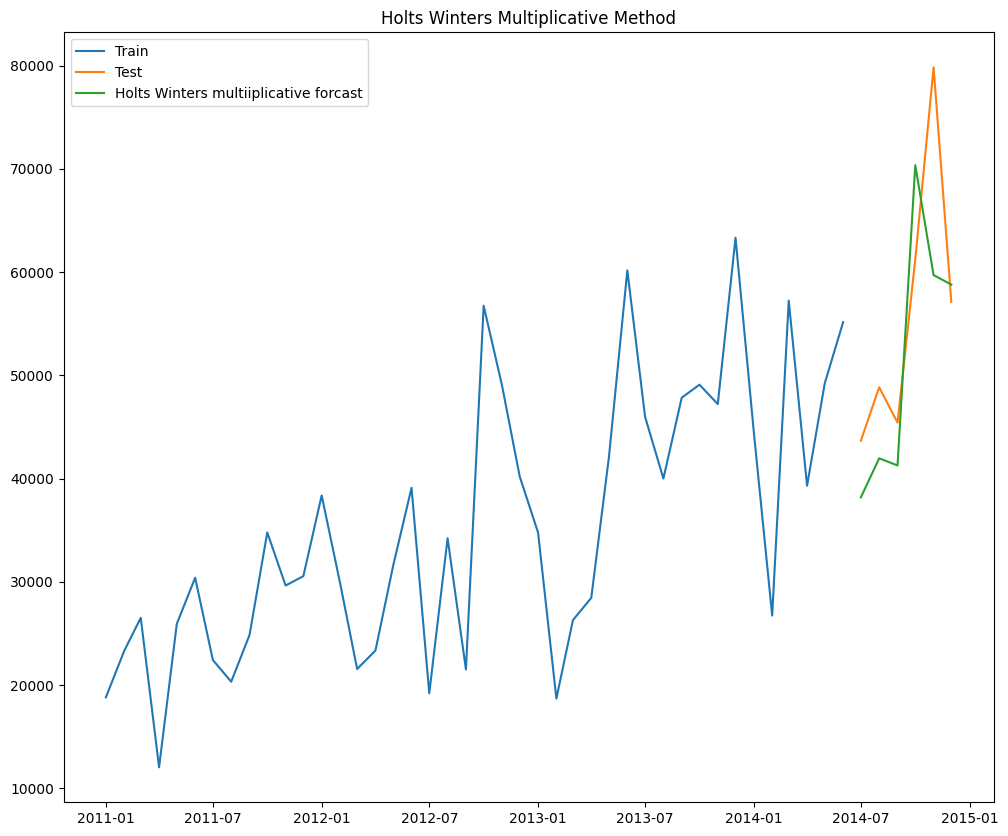

In [342]:
# Plot
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label='Test')
plt.plot(y_hat_hwm['hw_forecast'],label ='Holts Winters multiiplicative forcast')
plt.legend(loc='best')
plt.title('Holts Winters Multiplicative Method')
plt.show()

In [343]:
# Calculate RSME AND MAPE
rmse = np.sqrt(mean_squared_error(test_df['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_hwm['hw_forecast'])/test_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts Multiplicative  method 12m'],'MAPE':[mape],'RSME':[rsme]})

results = pd.concat([results,tempResults])
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96
0,Simple Exponential Smoothing forcast,15.99,15011.49
0,Holts Exponential Smoothing forcast,14.64,11456.45
0,Holts Additive method 12m,13.02,11456.45
0,Holts Additive method 6m,10.52,11456.45
0,Holts Multiplicative method 12m,13.14,11456.45


### For Smoothing techniques we can conclude that Holts additive method , taking seasonal_period at 6 is the to forecast as  it would be more close to the actual sales